<a href="https://colab.research.google.com/github/ikhwandio4/PCVK_Ganjil_2024/blob/main/week3pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io

**tranformasi linier Brightness**

formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi,f(x,y) adalah nilai pixel asli,b adalah nilai brighnes

 mengubah tingkat kecerahan citra 
----------------------------------
masukkan nilai kecerahan: 50


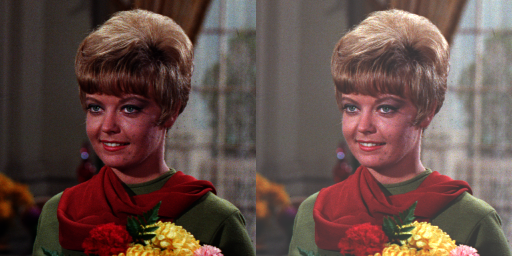

In [ ]:
print(' mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape,original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+brightness,0,255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original,brightness_image])
cv2_imshow(final_frame)

**tugas praktikum**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

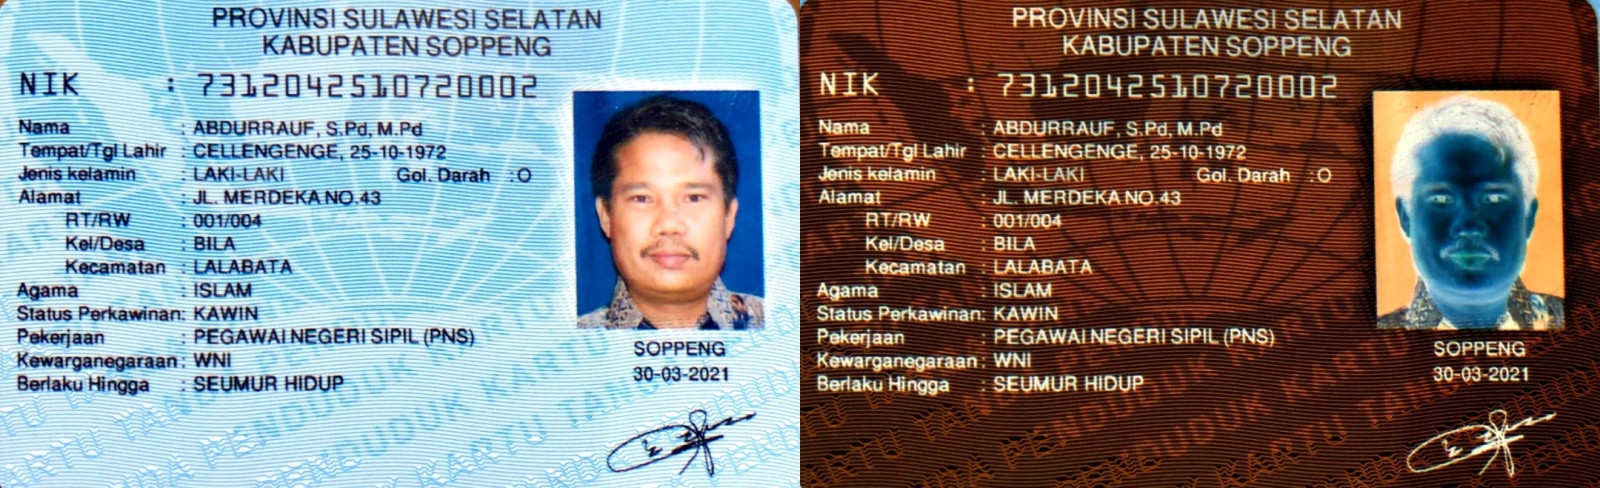

In [ ]:

original = cv.imread("/content/drive/MyDrive/pcvk/KTP.jpeg.jpg")
brightness_image = np.zeros(original.shape,original.dtype)

#membalikkan nilai pixel
inverted_image = 255 - original

final_frame = cv.hconcat([original,inverted_image])
cv2_imshow(final_frame)


mengubah kontras dan tingkat kecerahan

 mengubah tingkat kecerahan citra 
----------------------------------
masukkan tingkat kecerahan [-255 - 255]: 50
masukkan kontras [1.0 - 3.0]: 2


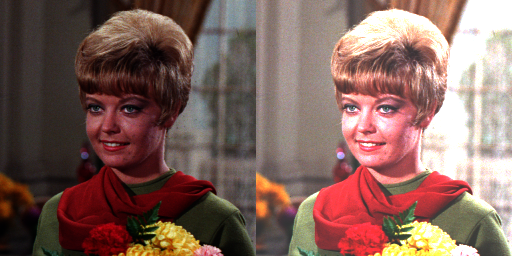

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

# Baca citra asli
original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')

# Inisialisasi gambar kontras dengan ukuran dan tipe data yang sama
kontras_image = np.zeros(original.shape, original.dtype)

# Akses per piksel dengan loop
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      kontras_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Atau cara simple tanpa loop
# kontras_image_simple = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Gabungkan citra asli dengan hasil citra yang sudah diubah
final_frame = cv.hconcat([original, kontras_image])

# Tampilkan hasil
cv2_imshow(final_frame)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah Tingkat Kecerahan dan Kontras Citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


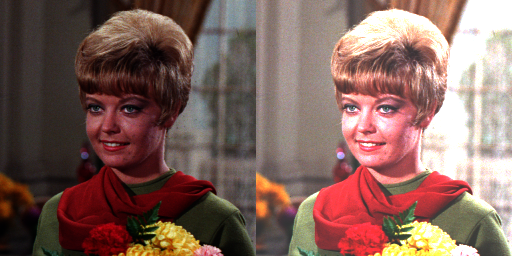

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah Tingkat Kecerahan dan Kontras Citra')
print('--------------------------------------------')

try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')
    # Menghentikan eksekusi jika input salah
    exit()

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')

# Memastikan citra berhasil dibaca
if original is None:
    print('Error: Citra tidak ditemukan atau path salah')
    exit()

# Inisialisasi gambar dengan ukuran dan tipe data yang sama dengan citra asli
kontras_image = np.zeros(original.shape, original.dtype)

# Akses per piksel menggunakan transformasi manual (diaktifkan jika diperlukan)
# for y in range(original.shape[0]):
#     for x in range(original.shape[1]):
#         for c in range(original.shape[2]):
#             new_value = contrast * original[y, x, c] + brightness
#             kontras_image[y, x, c] = np.clip(new_value, 0, 255)

# Cara simple tanpa loop menggunakan cv.convertScaleAbs
kontras_image = cv.convertScaleAbs(original, beta=brightness, alpha=contrast)

# Menggabungkan citra asli dengan citra hasil perubahan brightness dan kontras
final_frame = cv.hconcat([original, kontras_image])

# Menampilkan hasil
cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

averaging

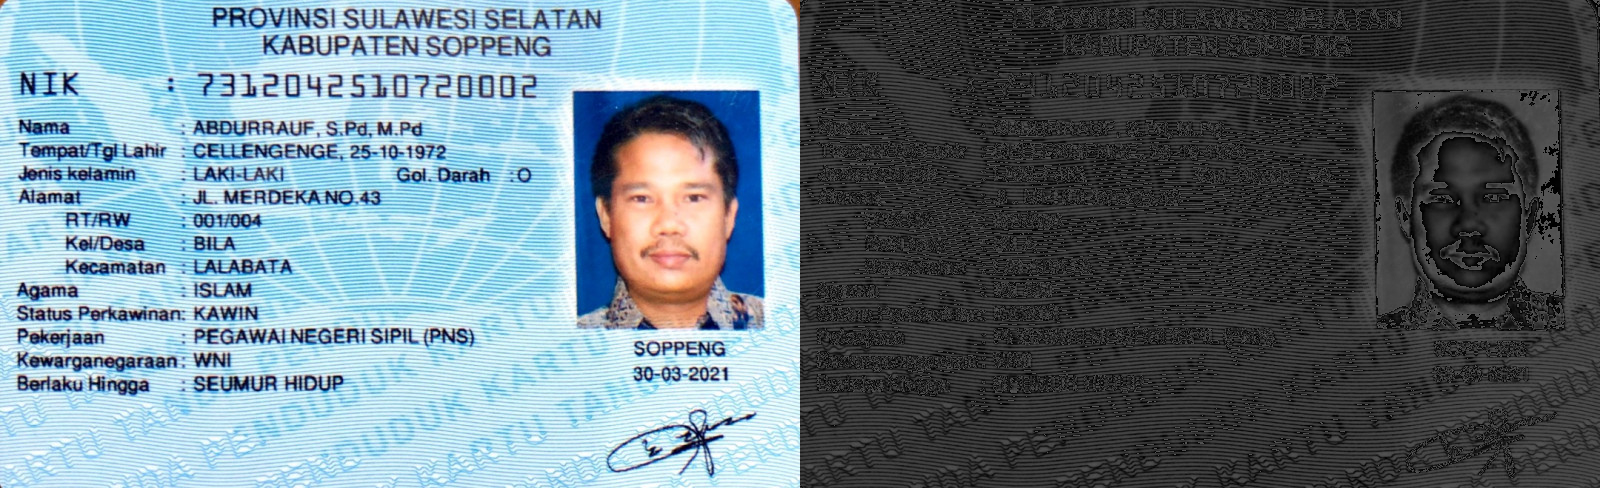

In [15]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca citra berwarna
image = cv.imread('/content/drive/MyDrive/pcvk/KTP.jpeg.jpg')

# Memastikan citra berhasil dibaca
if image is None:
    print('Error: Citra tidak ditemukan atau path salah')
    exit()

# Pisahkan saluran warna B, G, R dari citra berwarna
B, G, R = cv.split(image)

# 1. Metode Averaging (mengambil rata-rata dari R, G, B)
grayscale_avg = (R + G + B) / 3
grayscale_avg = grayscale_avg.astype(np.uint8)  # Konversi ke tipe data uint8

# Ubah grayscale menjadi gambar 3 saluran agar bisa digabung dengan gambar asli
grayscale_avg_3ch = cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2BGR)

# Gabungkan gambar asli dengan hasil grayscale
final_frame = cv.hconcat([image, grayscale_avg_3ch])

# Tampilkan hasil
cv2_imshow(final_frame)




Lightness

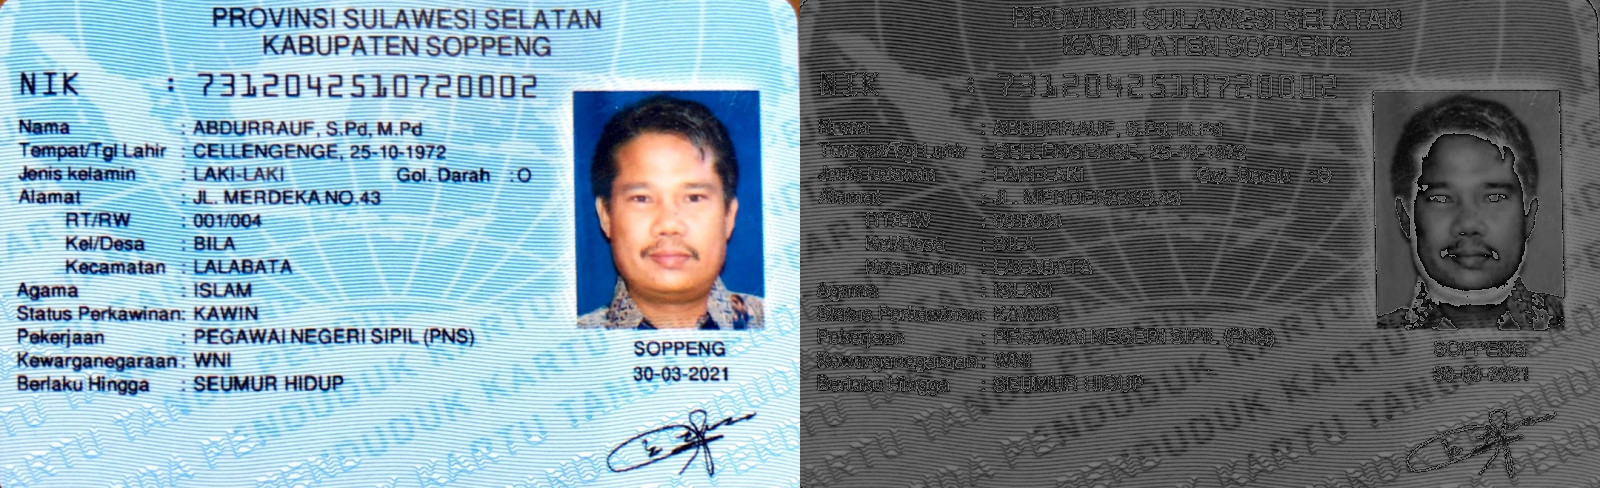

In [18]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca citra berwarna
image = cv.imread('/content/drive/MyDrive/pcvk/KTP.jpeg.jpg')

# Memastikan citra berhasil dibaca
if image is None:
    print('Error: Citra tidak ditemukan atau path salah')
    exit()

# Pisahkan saluran warna B, G, R dari citra berwarna
B, G, R = cv.split(image)

# 2. Metode Lightness: Mengambil rata-rata antara nilai maksimum dan minimum dari setiap piksel
max_val = np.maximum(np.maximum(R, G), B)  # Nilai maksimum dari saluran R, G, B
min_val = np.minimum(np.minimum(R, G), B)  # Nilai minimum dari saluran R, G, B
grayscale_lightness = (max_val + min_val) / 2  # Hitung rata-rata (lightness)
grayscale_lightness = grayscale_lightness.astype(np.uint8)  # Konversi ke uint8

# Ubah grayscale menjadi gambar 3 saluran agar bisa digabung dengan gambar asli
grayscale_lightness_3ch = cv.cvtColor(grayscale_lightness, cv.COLOR_GRAY2BGR)

# Gabungkan gambar asli dengan hasil grayscale lightness secara horizontal
final_frame = cv.hconcat([image, grayscale_lightness_3ch])

# Tampilkan hasil
cv2_imshow(final_frame)


Luminance

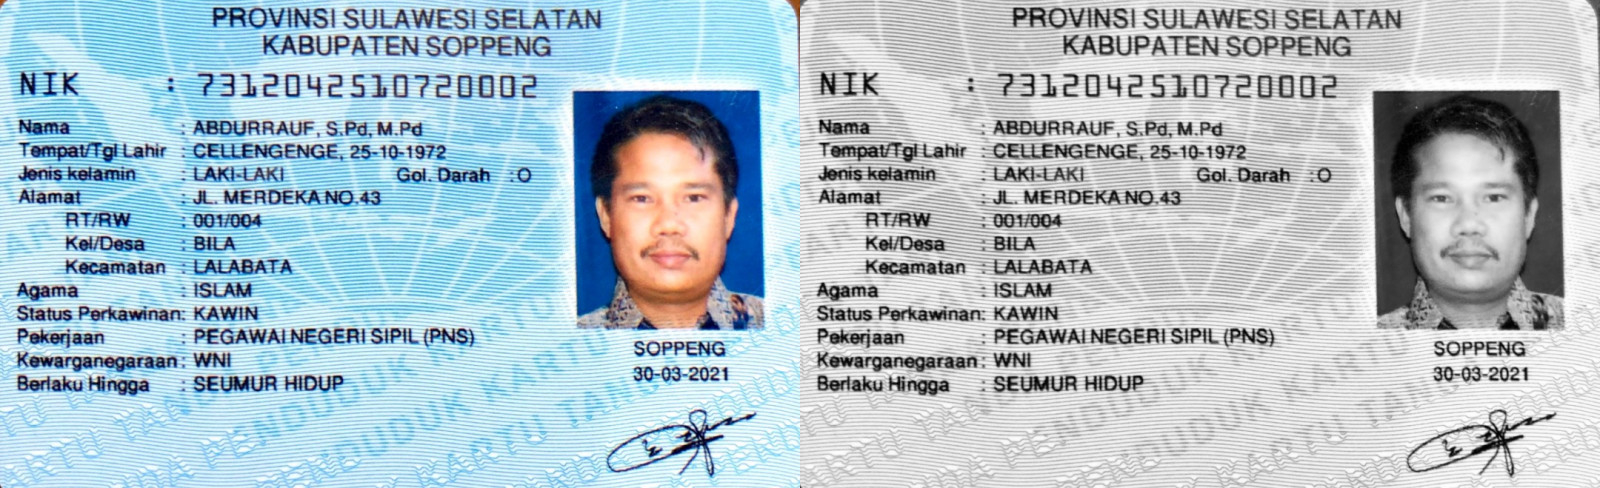

In [19]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca citra berwarna
image = cv.imread('/content/drive/MyDrive/pcvk/KTP.jpeg.jpg')

# Memastikan citra berhasil dibaca
if image is None:
    print('Error: Citra tidak ditemukan atau path salah')
    exit()

# Pisahkan saluran warna B, G, R dari citra berwarna
B, G, R = cv.split(image)

# 3. Metode Luminance
grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B
grayscale_luminance = grayscale_luminance.astype(np.uint8)  # Konversi ke uint8

# Ubah grayscale luminance menjadi gambar 3 saluran agar bisa digabung dengan gambar asli
grayscale_luminance_3ch = cv.cvtColor(grayscale_luminance, cv.COLOR_GRAY2BGR)

# Gabungkan gambar asli dengan hasil grayscale luminance
final_frame = cv.hconcat([image, grayscale_luminance_3ch])

# Tampilkan hasil
cv2_imshow(final_frame)




Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

Original Image:


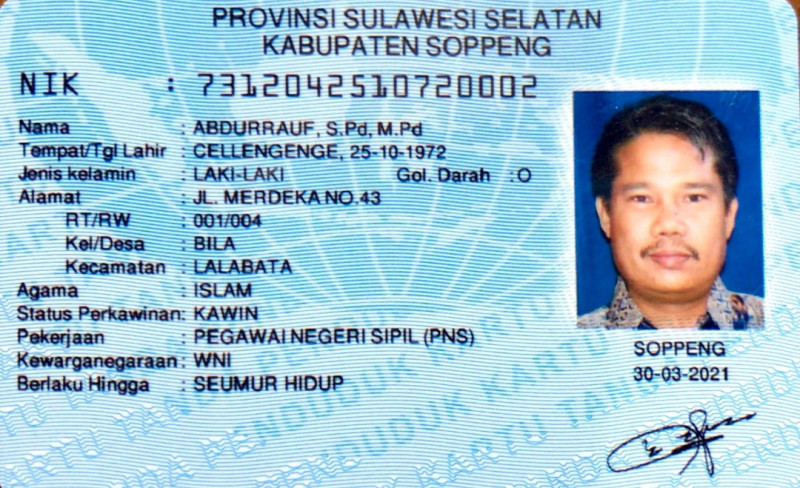


Selective Blue Coloring:


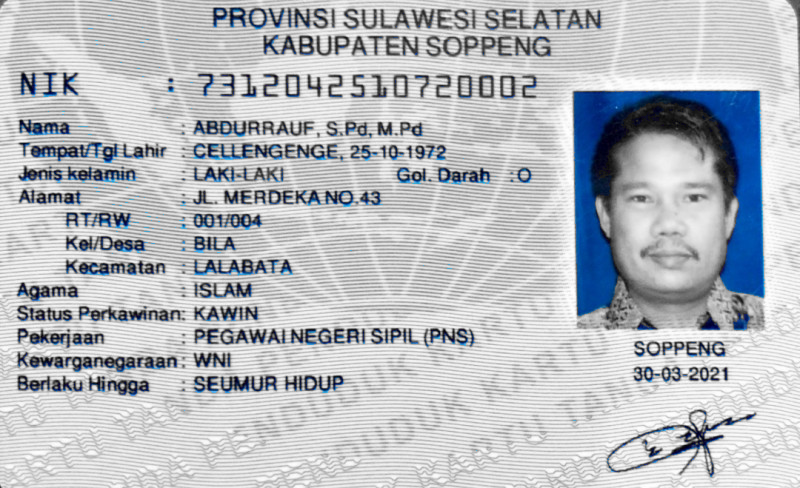

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def selective_blue(image, blue_range=(100, 150, 0), threshold=40):
    # Konversi gambar ke HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Definisikan range warna biru dalam HSV
    lower_blue = np.array([blue_range[0] - threshold, blue_range[1], blue_range[2]])
    upper_blue = np.array([blue_range[0] + threshold, 255, 255])

    # Buat mask untuk warna biru
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Invert mask
    mask_inv = cv2.bitwise_not(mask)

    # Konversi gambar asli ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Ambil bagian biru dari gambar asli
    blue = cv2.bitwise_and(image, image, mask=mask)

    # Ambil bagian non-biru dari gambar grayscale
    non_blue = cv2.bitwise_and(gray, gray, mask=mask_inv)

    # Gabungkan keduanya
    result = cv2.add(blue, non_blue)

    return result

# Baca gambar
image = cv2.imread('/content/drive/MyDrive/pcvk/KTP.jpeg.jpg')

if image is None:
    raise ValueError("Gambar tidak dapat dibaca. Pastikan path file benar.")

# Terapkan selective blue coloring
result = selective_blue(image)

# Tampilkan hasil
print("Original Image:")
cv2_imshow(image)
print("\nSelective Blue Coloring:")
cv2_imshow(result)
